In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Opening up the 4 data files
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [3]:
#First Glance at the Data.
customers.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


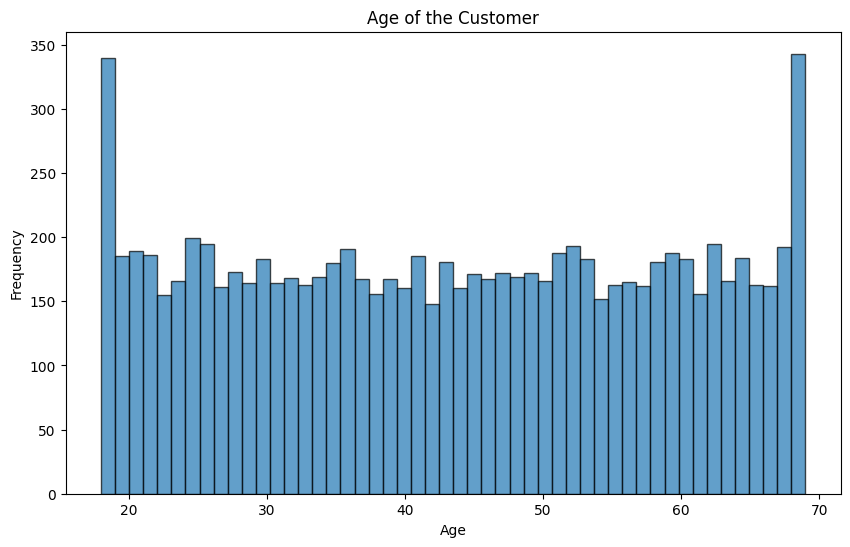

In [5]:
#Visualizing "Age" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(customers['age'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Age of the Customer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

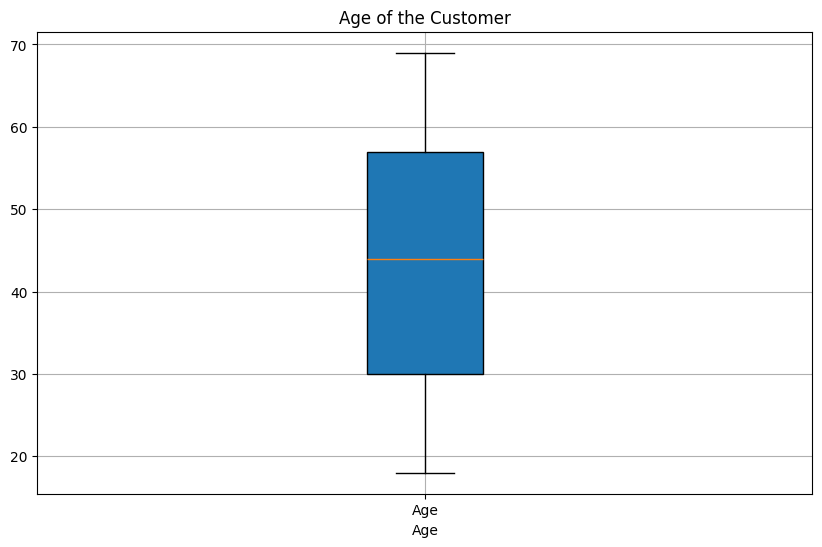

In [6]:
#Visualizing "Age" using Boxplots without any missing values 
plt.figure(figsize=(10, 6))
plt.boxplot(customers['age'].dropna(), vert=True, patch_artist=True, labels=['Age'])
plt.title('Age of the Customer')
plt.xlabel('Age')
plt.grid(True)
plt.show()

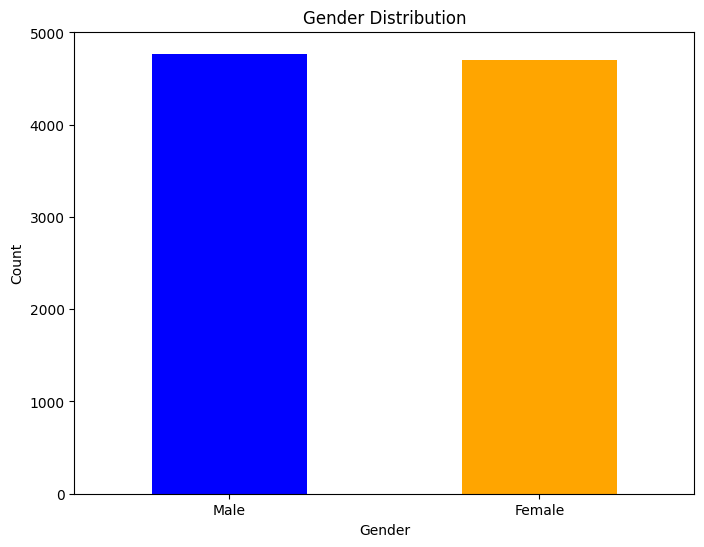

In [7]:
#Visualizing "Gender" using Barplot
gender_counts = customers['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [8]:
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [9]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


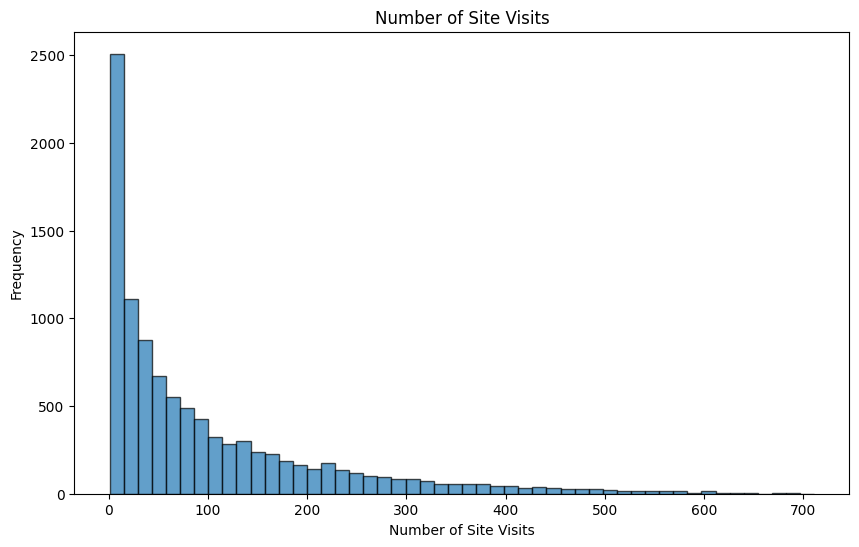

In [10]:
#Visualizing "Number of Site Visits" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(engagement['number_of_site_visits'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.ylabel('Frequency')
plt.show()

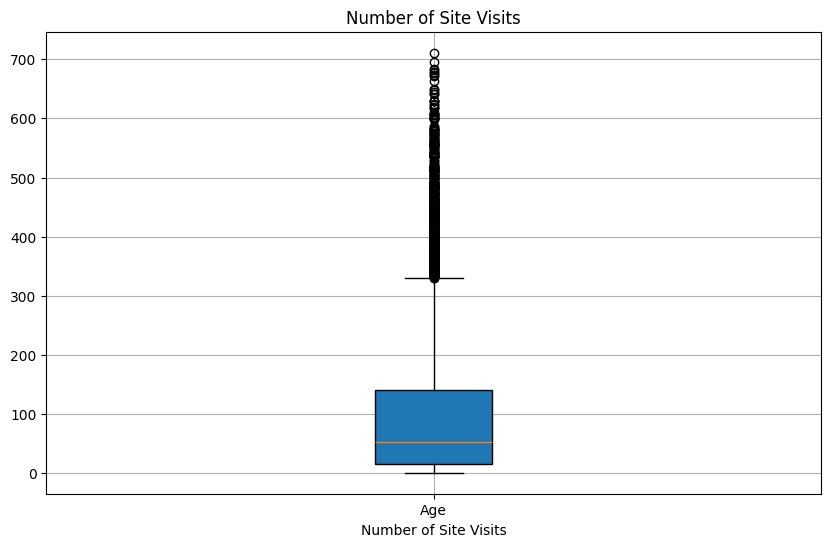

In [11]:
#Visualizing Boxplot for "Number of Sites Visisted" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(engagement['number_of_site_visits'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.grid(True)
plt.show()

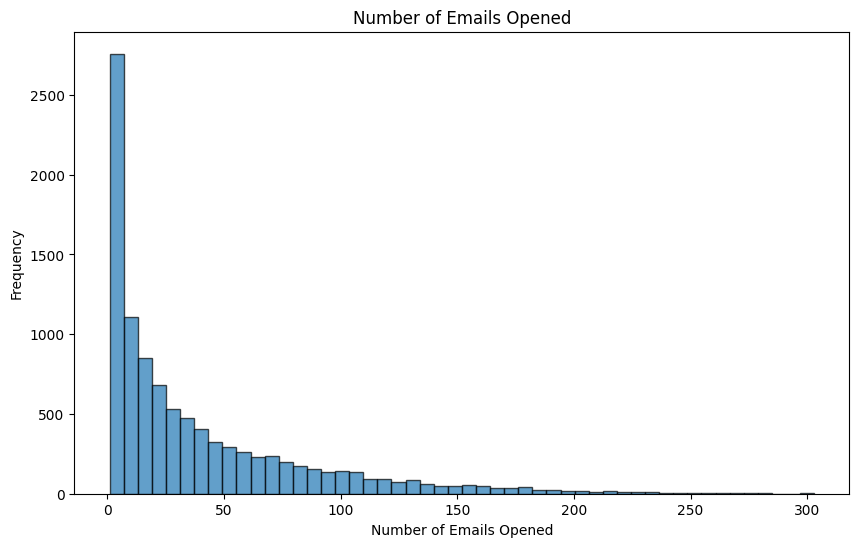

In [12]:
#Visualizing "Number of Emails Opened" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(engagement['number_of_emails_opened'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Emails Opened')
plt.xlabel('Number of Emails Opened')
plt.ylabel('Frequency')
plt.show()

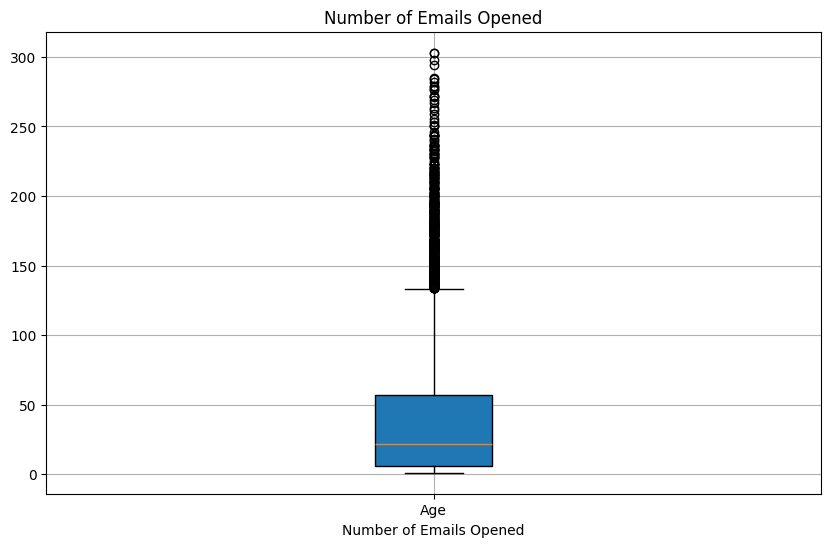

In [13]:
#Visualizing Boxplot for "Number of Emails Opened" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(engagement['number_of_emails_opened'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Number of Emails Opened')
plt.xlabel('Number of Emails Opened')
plt.grid(True)
plt.show()

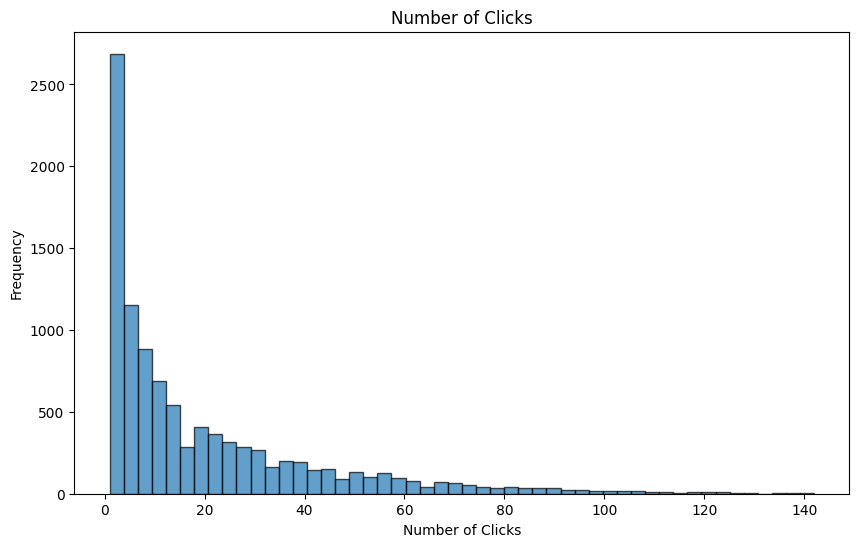

In [14]:
#Visualizing "Number of Clicks" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(engagement['number_of_clicks'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.show()

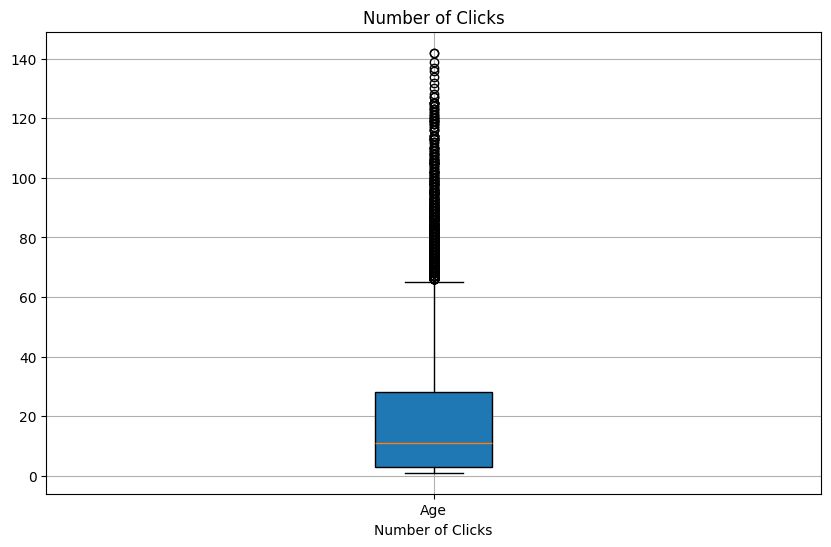

In [15]:
#Visualizing Boxplot for "Number of Clicks" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(engagement['number_of_clicks'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Number of Clicks')
plt.xlabel('Number of Clicks')
plt.grid(True)
plt.show()

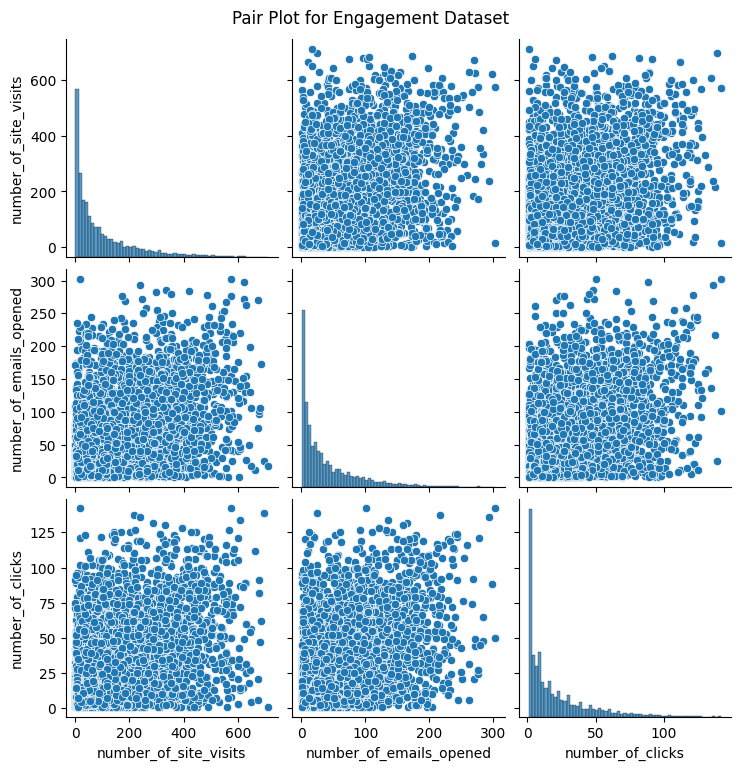

In [16]:
#Using Pairplot to display scatter plots for all possible pairs
sns.pairplot(engagement, vars=['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks'])
plt.suptitle('Pair Plot for Engagement Dataset', y=1.02)
plt.show()

In [17]:
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [18]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


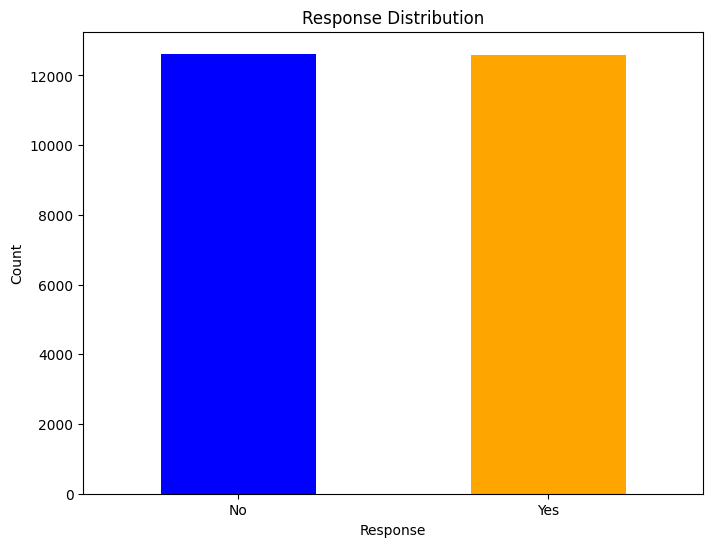

In [19]:
#Visualizing "Response" using Barplot
response_counts = marketing['response'].value_counts()

plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

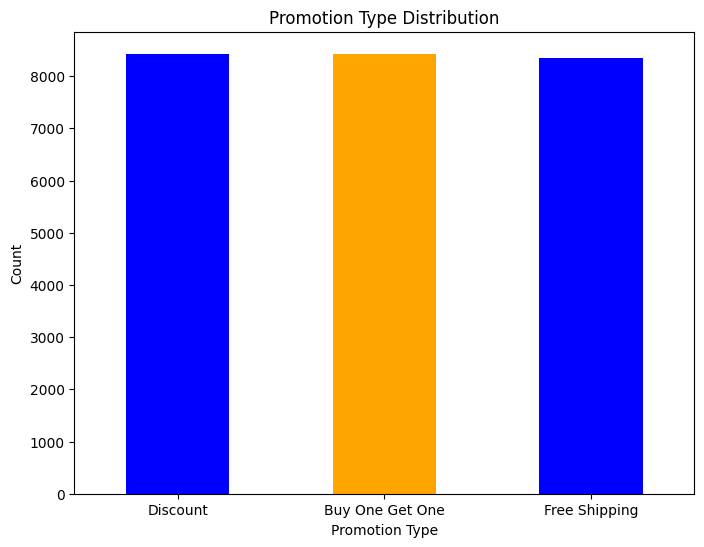

In [20]:
#Visualizing "Response" using Barplot
promotion_type_counts = marketing['promotion_type'].value_counts()

plt.figure(figsize=(8, 6))
promotion_type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Promotion Type Distribution')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

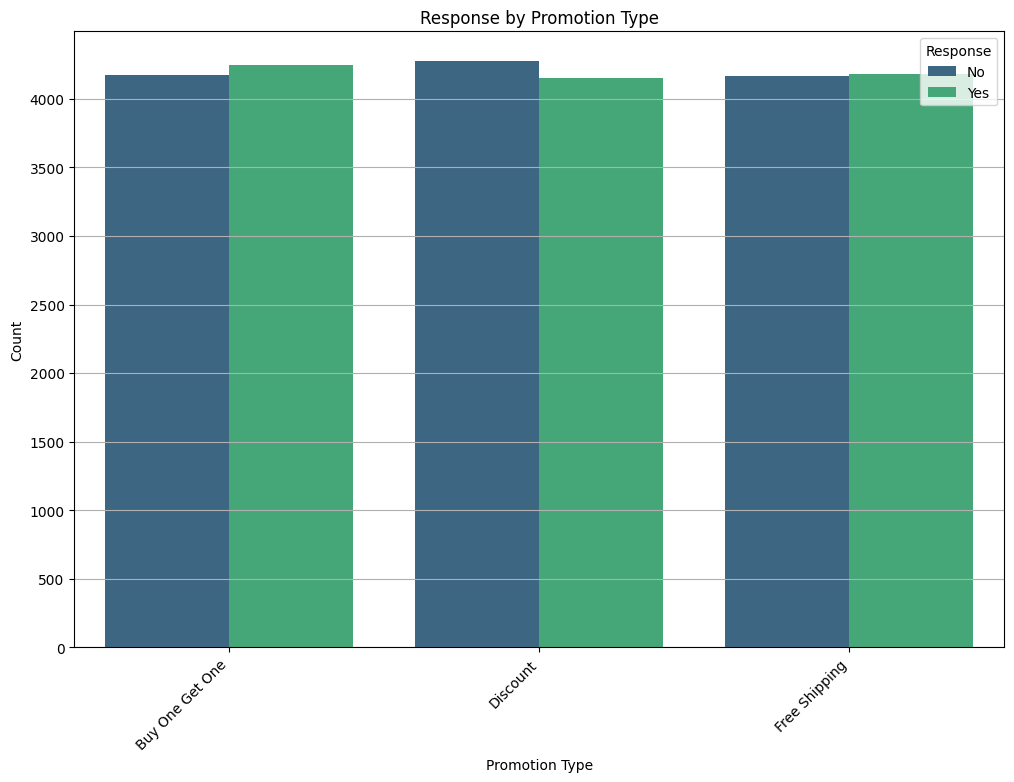

In [21]:
#Using Grouped Bar Chart to count the proportion of responses for each promotion type.
plt.figure(figsize=(12, 8))
sns.countplot(data=marketing, x='promotion_type', hue='response', palette='viridis')
plt.title('Response by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.legend(title='Response')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [22]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


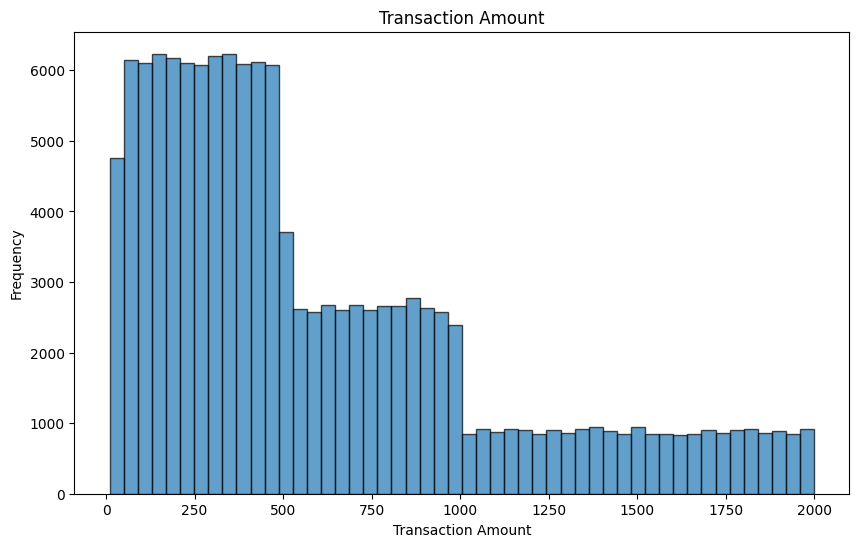

In [24]:
#Visualizing "Transaction Amount" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(transactions['transaction_amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

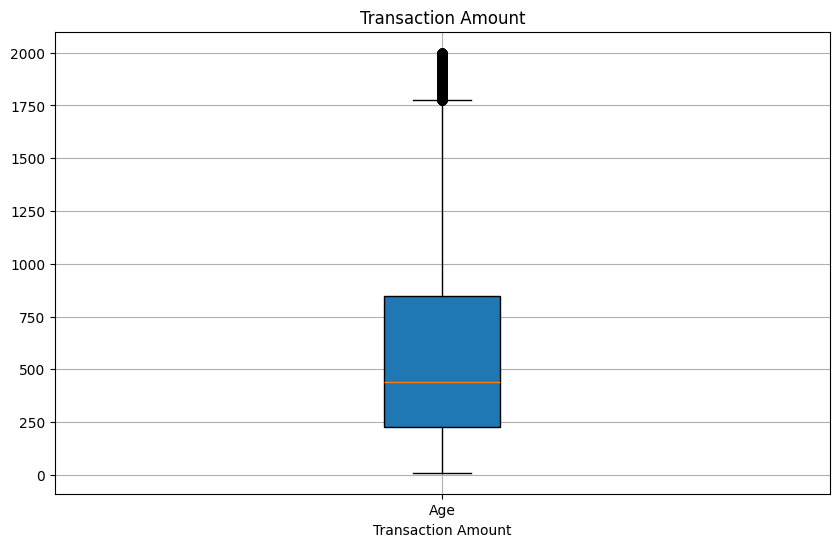

In [25]:
#Visualizing Boxplot for "Transaction Amount" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(transactions['transaction_amount'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Transaction Amount')
plt.xlabel('Transaction Amount')
plt.grid(True)
plt.show()

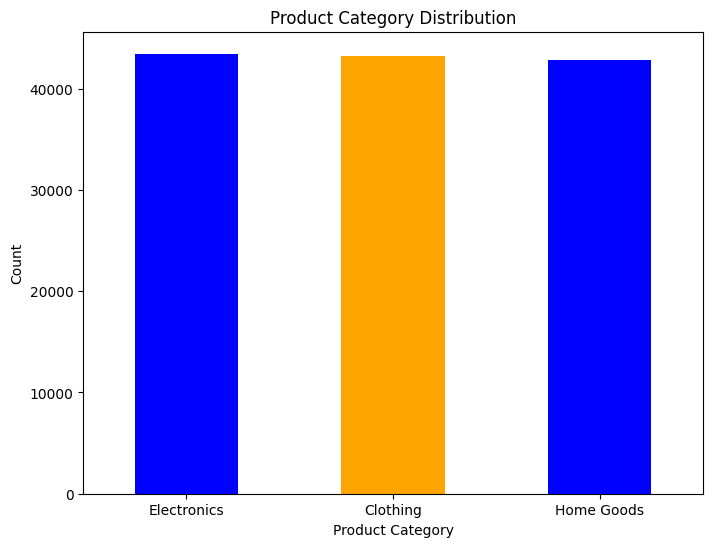

In [26]:
#Visualizing "Product Category" using Barplot
product_category_counts = transactions['product_category'].value_counts()

plt.figure(figsize=(8, 6))
product_category_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

C:\Users\syedc\AppData\Local\Temp\ipykernel_23244\1746473223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=transactions, x='product_category', y='transaction_amount', palette='Set3')


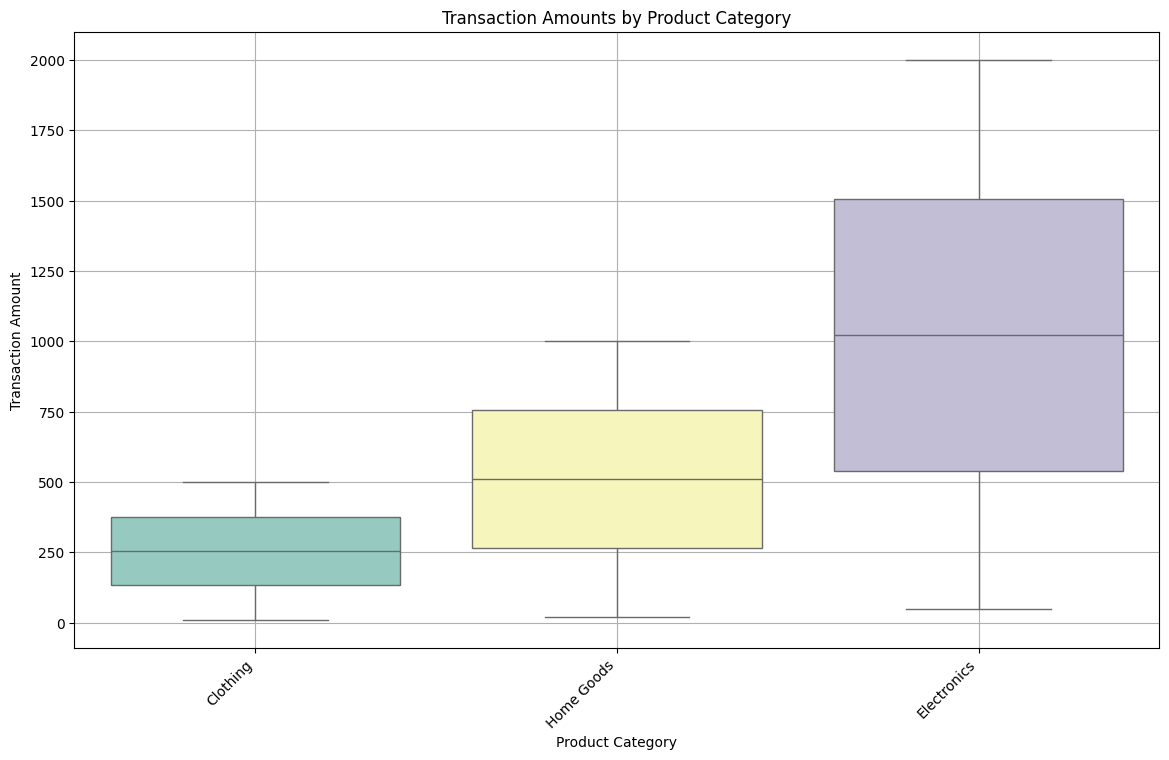

In [27]:
#Using Boxplot to compare the distribution of transaction amounts across different product categories
plt.figure(figsize=(14, 8))
sns.boxplot(data=transactions, x='product_category', y='transaction_amount', palette='Set3')
plt.title('Transaction Amounts by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#### Customer Dataset has missing values in "Age" and "Gender" column.

In [28]:
#Finding how much data is missing for "Age" in the customer data set
missing_percentage_age = customers['age'].isnull().mean() * 100
missing_percentage_age

10.09

#### Age is a numerical column that's missing about 10% of the data, thus, I'm going to use imputation.

In [29]:
#Looking at the mean for the customer dataset in order to determine if mean is good measure for imputation
Mean_Age = customers['age'].mean()
Mean_Age

43.467467467467465

In [30]:
#Looking at the median for the customer dataset in order to determine if median is good measure for imputation
Median_Age = customers['age'].median()
Median_Age

44.0

In [31]:
#Imputing Missing Value with Mean for the "Age" Variable
Mean_Age = customers['age'].mean()
customers['age'].fillna(Mean_Age, inplace=True)


C:\Users\syedc\AppData\Local\Temp\ipykernel_23244\1193951274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['age'].fillna(Mean_Age, inplace=True)


In [32]:
#Checking the Customers Data for to see if it was imputed correctly
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 10000 non-null  float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [33]:
#Finding how much data is missing for "Gender" in the customer data set
missing_percentage_gender = customers['gender'].isnull().mean() * 100
missing_percentage_gender

5.33

#### Gender is a categorical column that's only missing about 5% of the data, thus, I'm going to drop the missing data

In [34]:
#Dropping the "Gender" variable because its a categorical variable and currently has missing values.
customers.dropna(subset=['gender'], inplace=True)

In [35]:
#Checking the Customer Dataset again for confirmation of the dropped variable.
Missing_Values_Gender = customers['gender'].isnull().sum()
print(f"Number of Missing Values in 'Gender' Column: {Missing_Values_Gender}")

Number of Missing Values in 'Gender' Column: 0


In [36]:
#Converting "Join Date" to DateTime data type from "Object" in the customers dataset.
customers['join_date'] = pd.to_datetime(customers['join_date'])


In [37]:
#Converting "Join Date" to DateTime data type from "Object" in the customers dataset.
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date'])

In [38]:
#Converting Age from "Flot" datatype to an "Integer" 
customers['age'] = customers['age'].astype(int)

In [39]:
#Checking the "customers" dataset again to confirm the changes.
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9467 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         9467 non-null   int64         
 1   join_date           9467 non-null   datetime64[ns]
 2   last_purchase_date  9467 non-null   datetime64[ns]
 3   age                 9467 non-null   int32         
 4   gender              9467 non-null   object        
 5   location            9467 non-null   object        
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 480.7+ KB


In [40]:
#Converting "Campaign Date" to DateTime data type from "Object" in the "marketing" dataset.
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

In [41]:
#Checking the "marketing" dataset again to confirm the changes.
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_id     25200 non-null  int64         
 1   customer_id     25200 non-null  int64         
 2   response        25200 non-null  object        
 3   promotion_type  25200 non-null  object        
 4   campaign_date   25200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 984.5+ KB


In [42]:
#Converting "Transaction Date" to DateTime data type from "Object" in the "transactions" dataset.
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

In [43]:
#Checking the "transactions" dataset again to confirm the changes.
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      129545 non-null  int64         
 1   customer_id         129545 non-null  int64         
 2   transaction_date    129545 non-null  datetime64[ns]
 3   transaction_amount  129545 non-null  float64       
 4   product_category    129545 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.9+ MB


### Joining Tables at Customer Level

In [44]:
marketing_agg = marketing.groupby('customer_id')['campaign_id'].count().to_frame("number_of_Times_Yes")
transactions_agg = transactions.groupby('customer_id').aggregate(number_of_transactions = ('transaction_id','count'), customer_transaction_amount = ('transaction_amount','sum'), last_transaction_date = ('transaction_date', 'max'))

In [45]:
#Setting customers and engagement index as customer_id
customers.set_index('customer_id', inplace=True)
engagement.set_index('customer_id', inplace=True)

In [46]:
#Joining all tables
joint_data = customers.join(engagement).join(transactions_agg).join(marketing_agg)

In [47]:
#Looking at the Joined Data Table
joint_data.head()

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes
customer_id,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4
6,2022-01-01,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3


In [48]:
#Fill NaN values in the 'campaign_id' column with 0
joint_data['number_of_Times_Yes'].fillna(0, inplace=True)

C:\Users\syedc\AppData\Local\Temp\ipykernel_23244\1077643746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joint_data['number_of_Times_Yes'].fillna(0, inplace=True)


In [49]:
#Creating a new column for customer age in years
joint_data['customer_age'] = (joint_data['last_transaction_date'] - joint_data['join_date']).dt.days / 365.25


In [50]:
#Looking at the Joint Data to check the new customer age column.
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age
customer_id,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760
6,2022-01-01,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212


In [51]:
#Finding the measure of Central Tendency for Joint Data
joint_data.describe()

,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age
count,9467,9467,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467,9467.000000,9467.000000
mean,2022-03-18 21:09:47.514524416,2023-04-25 08:16:56.076898816,43.460125,100.229640,39.845674,19.700433,12.942326,7726.146575,2023-03-08 12:44:29.483468800,2.519277,0.970976
min,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,23.810000,2020-01-26 00:00:00,1.000000,0.000000
25%,2021-02-14 00:00:00,2022-09-18 12:00:00,32.000000,15.000000,6.000000,3.000000,7.000000,3841.855000,2022-07-16 00:00:00,2.000000,0.240931
50%,2022-03-18 00:00:00,2023-08-04 00:00:00,43.000000,53.000000,22.000000,11.000000,13.000000,7480.960000,2023-06-06 00:00:00,3.000000,0.700890
75%,2023-04-29 00:00:00,2024-02-11 00:00:00,55.000000,141.000000,57.000000,28.000000,19.000000,11266.015000,2024-01-01 00:00:00,4.000000,1.472964
max,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,2024-05-31 00:00:00,4.000000,4.199863
std,NaN,NaN,14.324400,118.933502,46.590041,22.992940,7.188319,4619.476901,NaN,1.112195,0.892097


In [52]:
#Calculating the Average Purchase Value for each customer
joint_data ['average_purchase_value'] = joint_data['customer_transaction_amount'] / joint_data['number_of_transactions']


#Creating a Column to find the Customer Value (Average Purchase Value x Average Number of Transactions)
joint_data['customer_value'] = joint_data['average_purchase_value'] * joint_data['number_of_transactions']


In [53]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age,average_purchase_value,customer_value
customer_id,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377,584.913333,3509.48
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488,675.702222,6081.32
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560,393.734000,7874.68
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760,646.856250,15524.55
6,2022-01-01,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821,603.202353,10254.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600,549.820000,5498.20
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153,487.358333,5848.30
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212,1167.710000,3503.13


In [54]:
#Creating a Column for Customer Lifetime Value (CLV) based on metrics used by Shopify
joint_data['customer_lifetime_value'] = joint_data['customer_value'] * (joint_data['customer_age'] + 1)

In [55]:
#Looking at the updated table for confirmation
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age,average_purchase_value,customer_value,customer_lifetime_value
customer_id,,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377,584.913333,3509.48,4595.232882
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488,675.702222,6081.32,15005.584257
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560,393.734000,7874.68,13092.127118
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760,646.856250,15524.55,36478.973409
6,2022-01-01,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821,603.202353,10254.44,19912.283559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600,549.820000,5498.20,8162.625462
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153,487.358333,5848.30,8282.089459
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212,1167.710000,3503.13,4519.781006


In [56]:
#Looking at spread of the "Customer Trasaction Amount"
joint_data['customer_lifetime_value'].describe()

count     9467.000000
mean     15588.801527
std      12651.334428
min         41.031506
25%       6329.406721
50%      12612.211054
75%      21191.738374
max      93902.162587
Name: customer_lifetime_value, dtype: float64

In [57]:
#Creating 3 intervals to turn the dataset into categorical variables (Low CLV < 25%), (25% < Medium CLV < 75%), (High CLV > 75%)
low_spenders = 6329.406721
high_spenders = 21191.738374

# Function to classify the data
def classify(customer_lifetime_value):
    if customer_lifetime_value < low_spenders:
        return 'Low CLV'
    elif customer_lifetime_value > high_spenders:
        return 'High CLV'
    else:
        return 'Medium CLV'

# Apply the classification to the 'Customer Transaction Amount'' column
joint_data['Type of Customer'] = joint_data['customer_lifetime_value'].apply(classify)

In [58]:
#Looking at the table again to confirm everything is in order
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age,average_purchase_value,customer_value,customer_lifetime_value,Type of Customer
customer_id,,,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377,584.913333,3509.48,4595.232882,Low CLV
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488,675.702222,6081.32,15005.584257,Medium CLV
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560,393.734000,7874.68,13092.127118,Medium CLV
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760,646.856250,15524.55,36478.973409,High CLV
6,2022-01-01,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821,603.202353,10254.44,19912.283559,Medium CLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600,549.820000,5498.20,8162.625462,Medium CLV
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153,487.358333,5848.30,8282.089459,Medium CLV
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212,1167.710000,3503.13,4519.781006,Low CLV


In [59]:
#Cleaning up the table
columns_to_drop = ['average_purchase_value', 'customer_value']
joint_data_final = joint_data.drop(columns=columns_to_drop)

In [60]:
#Viewing the Cleaned Table
joint_data_final

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age,customer_lifetime_value,Type of Customer
customer_id,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377,4595.232882,Low CLV
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488,15005.584257,Medium CLV
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560,13092.127118,Medium CLV
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760,36478.973409,High CLV
6,2022-01-01,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821,19912.283559,Medium CLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600,8162.625462,Medium CLV
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153,8282.089459,Medium CLV
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212,4519.781006,Low CLV


In [61]:
#Extracting the Year from the "Join Date" for the Model
joint_data_final['join_year'] = joint_data_final['join_date'].dt.year

# Dropping the original 'join_date' column
joint_data_final = joint_data_final.drop(columns=['join_date'])

In [62]:
#Viewing the Table again 
joint_data_final

,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age,customer_lifetime_value,Type of Customer,join_year
customer_id,,,,,,,,,,,,,,,
1,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377,4595.232882,Low CLV,2023
2,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488,15005.584257,Medium CLV,2021
4,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560,13092.127118,Medium CLV,2022
5,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760,36478.973409,High CLV,2022
6,2023-02-10,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821,19912.283559,Medium CLV,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600,8162.625462,Medium CLV,2022
9997,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153,8282.089459,Medium CLV,2022
9998,2024-01-30,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212,4519.781006,Low CLV,2023


In [63]:
#Extracting the Year from the "Last Purchase Date" for the Model
joint_data_final['last_purchase_year'] = joint_data_final['last_purchase_date'].dt.year

# Dropping the original 'Last Purchase Date' column
joint_data_final = joint_data_final.drop(columns=['last_purchase_date'])

In [64]:
#Viewing the Cleaned Table
joint_data_final

,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,last_transaction_date,number_of_Times_Yes,customer_age,customer_lifetime_value,Type of Customer,join_year,last_purchase_year
customer_id,,,,,,,,,,,,,,,
1,56,Female,North Shannonbury,10,15,1,6,3509.48,2024-03-12,4,0.309377,4595.232882,Low CLV,2023,2024
2,43,Male,Hillville,285,49,51,9,6081.32,2023-02-26,4,1.467488,15005.584257,Medium CLV,2021,2023
4,29,Male,Grossstad,110,30,17,20,7874.68,2022-08-31,4,0.662560,13092.127118,Medium CLV,2022,2022
5,43,Male,East Matthewfort,161,2,7,24,15524.55,2023-06-01,4,1.349760,36478.973409,High CLV,2022,2023
6,55,Female,North Richardfort,74,59,7,17,10254.44,2022-12-11,3,0.941821,19912.283559,Medium CLV,2022,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,42,Female,Johnstonborough,119,47,16,10,5498.20,2023-06-11,3,0.484600,8162.625462,Medium CLV,2022,2023
9997,26,Male,Jessicamouth,3,33,14,12,5848.30,2022-12-08,1,0.416153,8282.089459,Medium CLV,2022,2023
9998,39,Male,New John,53,17,5,3,3503.13,2024-01-01,1,0.290212,4519.781006,Low CLV,2023,2024


In [65]:
#Extracting the Year from the "Last Transaction Year" for the Model
joint_data_final['last_transaction_year'] = joint_data_final['last_transaction_date'].dt.year

# Dropping the original 'Last Trasaction Year' column
joint_data_final = joint_data_final.drop(columns=['last_transaction_date'])

In [66]:
#Viewing the Cleaned Table
joint_data_final

,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,number_of_Times_Yes,customer_age,customer_lifetime_value,Type of Customer,join_year,last_purchase_year,last_transaction_year
customer_id,,,,,,,,,,,,,,,
1,56,Female,North Shannonbury,10,15,1,6,3509.48,4,0.309377,4595.232882,Low CLV,2023,2024,2024
2,43,Male,Hillville,285,49,51,9,6081.32,4,1.467488,15005.584257,Medium CLV,2021,2023,2023
4,29,Male,Grossstad,110,30,17,20,7874.68,4,0.662560,13092.127118,Medium CLV,2022,2022,2022
5,43,Male,East Matthewfort,161,2,7,24,15524.55,4,1.349760,36478.973409,High CLV,2022,2023,2023
6,55,Female,North Richardfort,74,59,7,17,10254.44,3,0.941821,19912.283559,Medium CLV,2022,2023,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,42,Female,Johnstonborough,119,47,16,10,5498.20,3,0.484600,8162.625462,Medium CLV,2022,2023,2023
9997,26,Male,Jessicamouth,3,33,14,12,5848.30,1,0.416153,8282.089459,Medium CLV,2022,2023,2022
9998,39,Male,New John,53,17,5,3,3503.13,1,0.290212,4519.781006,Low CLV,2023,2024,2024


In [67]:
#Dropping the location column as it has too many unique values for Hot Encoding
joint_data_final= joint_data_final.drop(columns=['location'])

In [68]:
#One-Hot Encoding the Gender Column for the Model
joint_data_final = pd.get_dummies(joint_data_final, dtype=int, columns=['gender'], drop_first=True)

In [69]:
#Viewing the table to see the encoded data
joint_data_final.head()

,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,number_of_transactions,customer_transaction_amount,number_of_Times_Yes,customer_age,customer_lifetime_value,Type of Customer,join_year,last_purchase_year,last_transaction_year,gender_Male
customer_id,,,,,,,,,,,,,,
1,56,10,15,1,6,3509.48,4,0.309377,4595.232882,Low CLV,2023,2024,2024,0
2,43,285,49,51,9,6081.32,4,1.467488,15005.584257,Medium CLV,2021,2023,2023,1
4,29,110,30,17,20,7874.68,4,0.662560,13092.127118,Medium CLV,2022,2022,2022,1
5,43,161,2,7,24,15524.55,4,1.349760,36478.973409,High CLV,2022,2023,2023,1
6,55,74,59,7,17,10254.44,3,0.941821,19912.283559,Medium CLV,2022,2023,2022,0


In [70]:
#Viewing the List of Columns on the final table
joint_data_final.columns.to_list()

['age',
 'number_of_site_visits',
 'number_of_emails_opened',
 'number_of_clicks',
 'number_of_transactions',
 'customer_transaction_amount',
 'number_of_Times_Yes',
 'customer_age',
 'customer_lifetime_value',
 'Type of Customer',
 'join_year',
 'last_purchase_year',
 'last_transaction_year',
 'gender_Male']

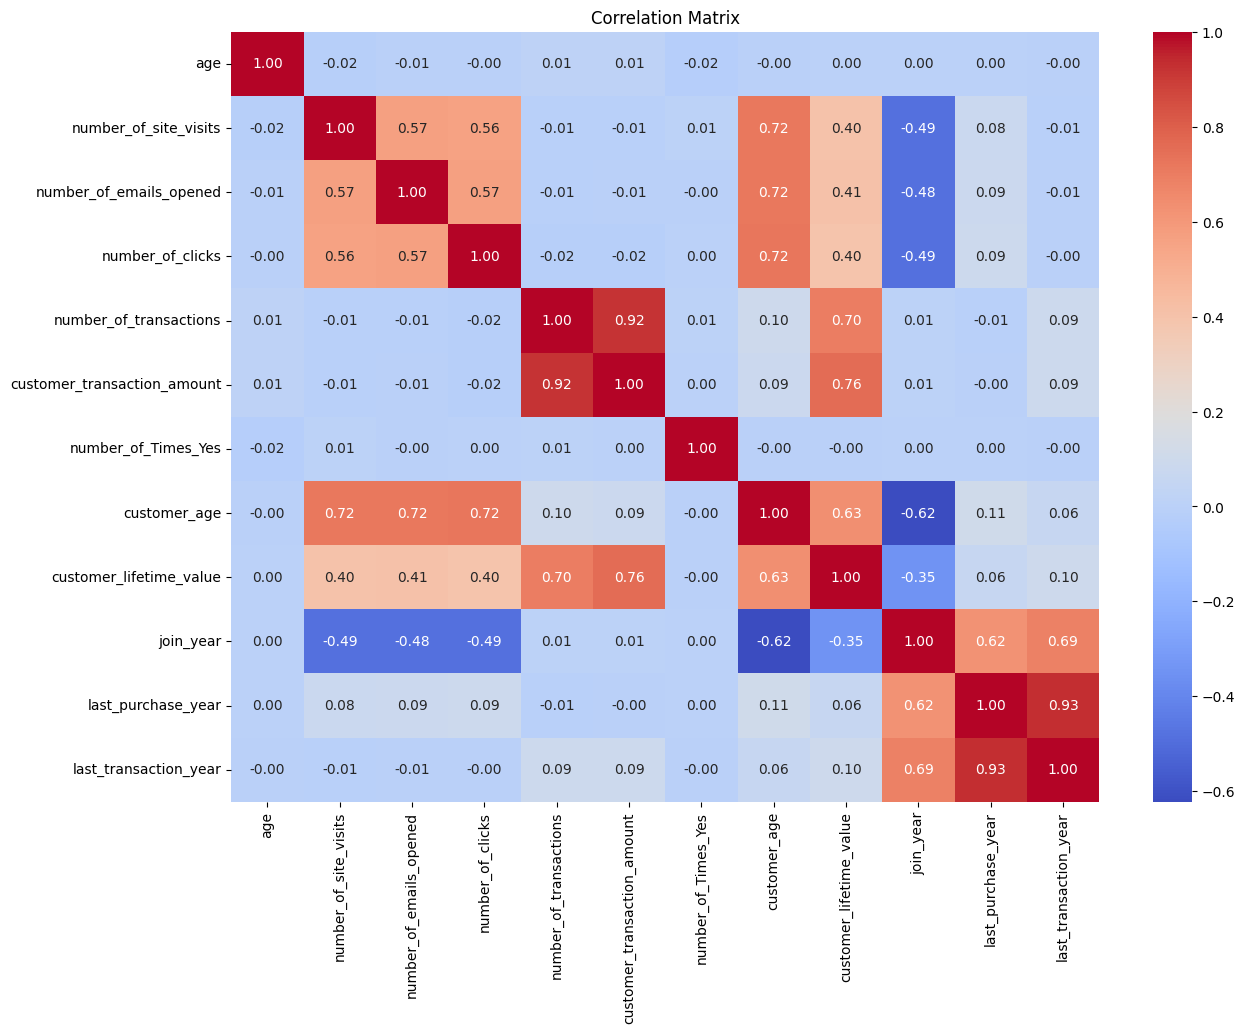

In [71]:
#Creating a Correlation Matrix to 

numerical_columns = [
    'age', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 
    'number_of_transactions', 'customer_transaction_amount', 'number_of_Times_Yes', 
    'customer_age', 'customer_lifetime_value', 'join_year', 'last_purchase_year', 
    'last_transaction_year'
]

correlation_matrix_selected = joint_data_final[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [72]:
#Defining Features & Target
X = joint_data_final.drop(columns=['Type of Customer', 'customer_lifetime_value'])
y = joint_data_final['Type of Customer']

In [73]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
#Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)

In [75]:
# Definin Scoring Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score,average='weighted'),
    'recall': make_scorer(recall_score,average='weighted'),
    'f1': make_scorer(f1_score,average='weighted')
}

In [76]:
#Cross Validating with 5 splits
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

c:\Users\syedc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\syedc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [77]:
# Convert results to DataFrame for better readability
cv_df = pd.DataFrame(cv_results)

In [78]:
# Putting the Results into Dataframe
cv_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,1.776633,0.041886,0.871700,0.871767,0.871700,0.871544
1,1.651361,0.036414,0.865892,0.865408,0.865892,0.865430
2,1.915529,0.035524,0.872161,0.872144,0.872161,0.872098
3,1.666008,0.040519,0.872689,0.872782,0.872689,0.872633
4,1.826026,0.039286,0.864237,0.864216,0.864237,0.864042


In [79]:
#Taking the Average of the Scores.
Logistic_Regression_Mean = cv_df.mean()
Logistic_Regression_Mean

fit_time          1.767111
score_time        0.038726
test_accuracy     0.869336
test_precision    0.869263
test_recall       0.869336
test_f1           0.869149
dtype: float64

#### KNN Model

In [80]:
#Testing the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)

In [81]:
#Cross Validating the KNN model
cv_results_knn = cross_validate(knn_model, X, y, cv=5, scoring=scoring)

In [82]:
# Convert results to DataFrame for better readability
cv_df_knn = pd.DataFrame(cv_results_knn)

In [83]:
# Putting the Results into Dataframe
cv_df_knn

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.040148,0.154505,0.889652,0.889702,0.889652,0.888513
1,0.021623,0.170326,0.882260,0.883529,0.882260,0.880704
2,0.023453,0.188429,0.886952,0.887526,0.886952,0.886047
3,0.028419,0.185467,0.885367,0.886584,0.885367,0.884158
4,0.027961,0.198520,0.880613,0.882716,0.880613,0.878870


In [84]:
#Taking the Average of the Scores.
KNN_Mean = cv_df_knn.mean()
KNN_Mean

fit_time          0.028321
score_time        0.179449
test_accuracy     0.884969
test_precision    0.886012
test_recall       0.884969
test_f1           0.883658
dtype: float64

In [85]:
#Testing the KNN Model
nb_model = GaussianNB()

In [86]:
#Cross Validating the Naive Bayes
nb_cv_results = cross_validate(nb_model, X, y, cv=5, scoring=scoring)

In [87]:
# Convert results to DataFrame for better readability
nb_cv_df = pd.DataFrame(nb_cv_results)

In [88]:
# Putting the Results into Dataframe
nb_cv_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.015426,0.036217,0.823654,0.822930,0.823654,0.822321
1,0.012306,0.030720,0.815206,0.815147,0.815206,0.813298
2,0.013299,0.031291,0.819863,0.820203,0.819863,0.818113
3,0.011972,0.032956,0.817221,0.817328,0.817221,0.816071
4,0.010928,0.034486,0.812467,0.813405,0.812467,0.810849


In [89]:
#Taking the Average of the Scores.
NB_Mean = nb_cv_df.mean()
NB_Mean

fit_time          0.012786
score_time        0.033134
test_accuracy     0.817682
test_precision    0.817802
test_recall       0.817682
test_f1           0.816130
dtype: float64